In [9]:
import re
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler

# parts of this code are adapted from Ben Mabey's sklearn notebook
# here: https://github.com/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
title = pd.read_csv('../project-data/character_table_18c19c.tsv', sep = '\t', encoding = 'utf-8')

In [3]:
#title = title.rename(columns = {'year': 'releaseyr'})
title.head()

,docid,charname,charid,gender,pubdate,words
0,0,Betsey,0|Betsey,f,1891,was knew rang said possessed went read smiled ...
1,0,Bill,0|Bill,m,1891,said was-find was-addressing said-moment said-...
2,0,Phil,0|Phil,m,1891,alighted cross halted struck accomplished let ...
3,0,Elizabeth,0|Elizabeth,f,1891,says pay love go described said invitation car...
4,0,Mr.Jones,0|Mr.Jones,m,1891,came possessed proved admired bestowed noted w...


In [4]:
title.shape

(503553, 6)

In [5]:
title.describe(include = 'all')

,docid,charname,charid,gender,pubdate,words
count,503553.000000,503553,503553,503553,503553.000000,503553
unique,NaN,157379,503553,3,NaN,501627
top,NaN,John,13029|FatherEspana,m,NaN,had take gave were persisted see wore cut nigh...
freq,NaN,3070,1,297079,NaN,5
mean,8086.354416,NaN,NaN,NaN,1869.688102,NaN
std,4515.448295,NaN,NaN,NaN,24.646626,NaN
min,0.000000,NaN,NaN,NaN,1780.000000,NaN
25%,4118.000000,NaN,NaN,NaN,1854.000000,NaN
50%,8250.000000,NaN,NaN,NaN,1876.000000,NaN
75%,12254.000000,NaN,NaN,NaN,1891.000000,NaN


<AxesSubplot:title={'center':'Gender proportions'}>

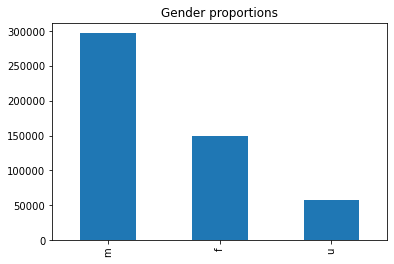

In [6]:
title['gender'].value_counts().plot(kind='bar', title='Gender proportions')

In [7]:
characters = pd.read_csv('../project-data/character_table_post1900.tsv/character_table_post1900.tsv', sep = '\t', encoding = 'utf-8')

In [8]:
characters.head()

,docid,charname,charid,gender,pubdate,words
0,chi.60782167,Spencer,chi.60782167|Spencer,m,1984,opened enter thought realised told awareness c...
1,chi.60782167,DrMelrose,chi.60782167|DrMelrose,u,1984,said took doubled knew knew came person good w...
2,chi.60782167,MrsKirk,chi.60782167|MrsKirk,f,1984,caused arrived making had turn has turned know...
3,chi.60782167,Kevin,chi.60782167|Kevin,m,1984,said expect going wanted said hearing stay ski...
4,chi.60782167,DrSmidt,chi.60782167|DrSmidt,m,1984,present said sighed fumbled gave said read off...


ParserError: Error tokenizing data. C error: Expected 3 fields in line 36, saw 4


In [9]:
file_content.head()

AttributeError: 'bytes' object has no attribute 'head'